In [1]:
import pandas as pd
ccpp_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/CCPP/Training_set_ccpp.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
ccpp_data.head()

,AT,EV,AP,RH,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68


In [4]:
ccpp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6410 non-null   float64
 1   EV      6410 non-null   float64
 2   AP      6410 non-null   float64
 3   RH      6410 non-null   float64
 4   PE      6410 non-null   float64
dtypes: float64(5)
memory usage: 250.5 KB


In [5]:
ccpp_data.describe()

,AT,EV,AP,RH,PE
count,6410.000000,6410.000000,6410.000000,6410.000000,6410.000000
mean,19.652120,54.298786,1013.227959,73.324212,454.363276
std,7.433792,12.685055,5.932562,14.675569,17.060129
min,1.810000,25.360000,992.890000,26.300000,420.260000
25%,13.580000,41.760000,1009.070000,63.352500,439.832500
50%,20.420000,52.080000,1012.955000,74.980000,451.440000
75%,25.720000,66.540000,1017.257500,84.897500,468.270000
max,35.560000,81.560000,1033.300000,100.160000,495.760000


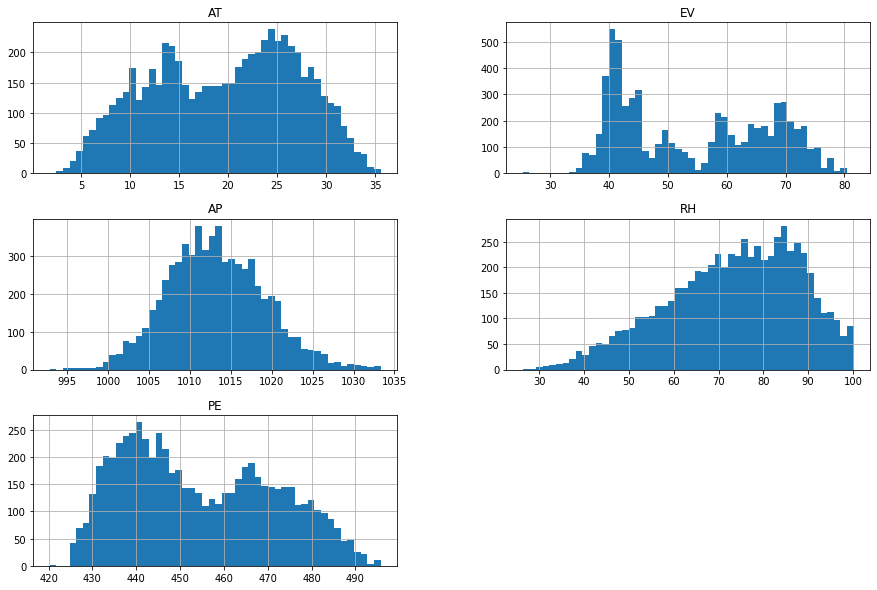

In [6]:
ccpp_data.hist(bins=50, figsize=(15, 10))
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(ccpp_data, test_size = 0.2, random_state = 3)

In [14]:
train_set.shape

(5128, 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1389dec908>,
      dtype=object)

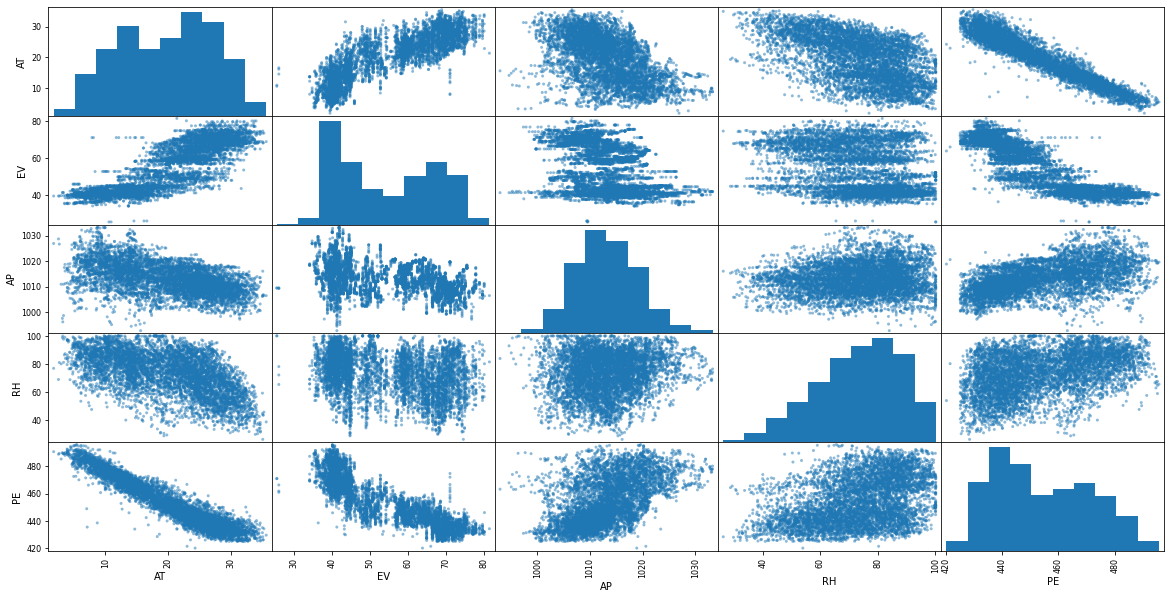

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(ccpp_data, figsize=(20, 10))


In [18]:
corr_matrix = ccpp_data.corr()
corr_matrix['PE'].sort_values(ascending=False)

PE    1.000000
AP    0.514595
RH    0.393906
EV   -0.869070
AT   -0.948487
Name: PE, dtype: float64

In [19]:
training_set = train_set.drop('PE', axis = 1)
training_label = train_set['PE'].copy()

In [20]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

training_set_tr = std_scaler.fit_transform(training_set)

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(training_set_tr, training_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
from sklearn.metrics import mean_squared_error
data_predictions = lin_reg.predict(training_set_tr)
lin_mse = mean_squared_error(training_label, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.538140728926327

In [23]:
lin_reg.intercept_, lin_reg.coef_

(454.464377925117,
 array([-14.89731424,  -2.86267325,   0.3108469 ,  -2.33614804]))

In [24]:
X_test = test_set.drop('PE', axis=1)
y_test = test_set['PE'].copy()

In [25]:
X_test_prepared = std_scaler.fit_transform(X_test)

In [26]:

final_predictions = lin_reg.predict(X_test_prepared)

In [27]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

4.537340100956693

In [28]:
def plot_learning_curves(model, training_set_tr, training_label):
    X_train, X_val, y_train, y_val = train_test_split(training_set, training_label, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)

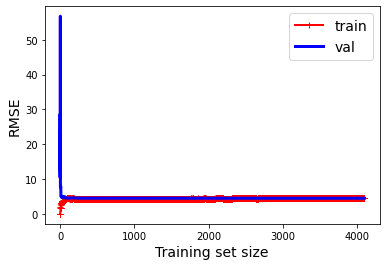

In [29]:
plot_learning_curves(lin_reg, training_set_tr, training_label)

In [30]:
CCPP_eval = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/CCPP/Testing_set_ccpp.csv')

In [31]:
CCPP_eval.head()

,AT,EV,AP,RH
0,19.64,48.06,1014.81,74.96
1,28.26,69.23,1013.01,42.10
2,27.98,67.17,1007.32,75.29
3,28.64,69.23,1013.11,37.13
4,9.34,38.08,1019.56,67.74


In [33]:
predictions=lin_reg.predict(CCPP_eval)

In [35]:
res = pd.DataFrame(predictions) 
res.index = CCPP_eval.index 
res.columns = ["prediction"]

from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>